In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow.keras import layers, Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [2]:
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"duggudurgesh","key":"8ca62f412f9aaec358063f61881ec1a8"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 /root/.kaggle/kaggle.json

In [7]:
!!kaggle datasets download -d duggudurgesh/plantdataset

['Downloading plantdataset.zip to /content',
 '',
 '  0% 0.00/1.75G [00:00<?, ?B/s]',
 '  0% 5.00M/1.75G [00:00<00:47, 39.7MB/s]',
 '  1% 26.0M/1.75G [00:00<00:13, 133MB/s] ',
 '  2% 40.0M/1.75G [00:00<00:14, 124MB/s]',
 '  4% 69.0M/1.75G [00:00<00:09, 185MB/s]',
 '  5% 88.0M/1.75G [00:00<00:10, 171MB/s]',
 '  6% 106M/1.75G [00:00<00:10, 174MB/s] ',
 '  7% 129M/1.75G [00:01<00:17, 97.0MB/s]',
 '  9% 154M/1.75G [00:01<00:14, 119MB/s] ',
 ' 10% 185M/1.75G [00:01<00:10, 154MB/s]',
 ' 11% 204M/1.75G [00:01<00:12, 136MB/s]',
 ' 13% 233M/1.75G [00:01<00:14, 115MB/s]',
 ' 14% 253M/1.75G [00:02<00:12, 129MB/s]',
 ' 15% 272M/1.75G [00:02<00:11, 142MB/s]',
 ' 17% 295M/1.75G [00:02<00:09, 162MB/s]',
 ' 18% 314M/1.75G [00:02<00:13, 111MB/s]',
 ' 19% 340M/1.75G [00:02<00:10, 138MB/s]',
 ' 21% 369M/1.75G [00:02<00:09, 164MB/s]',
 ' 22% 389M/1.75G [00:02<00:08, 168MB/s]',
 ' 23% 415M/1.75G [00:03<00:07, 191MB/s]',
 ' 25% 442M/1.75G [00:03<00:06, 213MB/s]',
 ' 26% 465M/1.75G [00:03<00:08, 157MB/s]',
 

In [8]:
!unzip plantdataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: PlantDataset/Apple Aphis spp(162)/img (49).jpg  
  inflating: PlantDataset/Apple Aphis spp(162)/img (5).jpg  
  inflating: PlantDataset/Apple Aphis spp(162)/img (50).jpg  
  inflating: PlantDataset/Apple Aphis spp(162)/img (51).jpg  
  inflating: PlantDataset/Apple Aphis spp(162)/img (52).jpg  
  inflating: PlantDataset/Apple Aphis spp(162)/img (53).jpg  
  inflating: PlantDataset/Apple Aphis spp(162)/img (54).jpg  
  inflating: PlantDataset/Apple Aphis spp(162)/img (55).jpg  
  inflating: PlantDataset/Apple Aphis spp(162)/img (56).jpg  
  inflating: PlantDataset/Apple Aphis spp(162)/img (57).jpg  
  inflating: PlantDataset/Apple Aphis spp(162)/img (58).jpg  
  inflating: PlantDataset/Apple Aphis spp(162)/img (59).jpg  
  inflating: PlantDataset/Apple Aphis spp(162)/img (6).jpg  
  inflating: PlantDataset/Apple Aphis spp(162)/img (60).jpg  
  inflating: PlantDataset/Apple Aphis spp(162)/img (61).jpg  
  inflating: PlantDat

In [9]:
! pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow.keras import layers, Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [11]:
import splitfolders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("/content/PlantDataset", output="test_train-original",
    seed=1337, ratio=(.8,.1, .1), group_prefix=None, move=False) # default values

Copying files: 5106 files [00:07, 715.46 files/s] 


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
train_dir = "/content/test_train-original/train"
val_dir = "/content/test_train-original/val"
test_dir = "/content/test_train-original/test"

In [14]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
                                                          # featurewise_center=True,
                                                          # featurewise_std_normalization=True,
                                                          # rotation_range=90,
                                                          # width_shift_range=0.2,
                                                          # height_shift_range=0.2,
                                                          # horizontal_flip=True,
                                                          # zoom_range=0.2,
                                                          )

In [15]:
train_gen = datagen.flow_from_directory(train_dir,
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                        shuffle=True,
                                                 class_mode = 'categorical')
test_gen= datagen.flow_from_directory(test_dir,
                                            target_size = (224,224),
                                            batch_size = 32,
                                      shuffle=False,
                                            class_mode ='categorical')
val_gen = datagen.flow_from_directory(val_dir,
                                            target_size = (224,224),
                                            batch_size = 32,
                                      shuffle=True,
                                          class_mode = 'categorical')

Found 4077 images belonging to 20 classes.
Found 526 images belonging to 20 classes.
Found 502 images belonging to 20 classes.


In [16]:
# Visualizing data
import os 
def visualize_random_images(dataset_type="train", label_type="Downy mildew(120)"):
    
    sample = 9
    
    plt.figure(figsize=(15, 8))
    type_dir = train_dir if dataset_type=="train" else test_dir
    base_dir = os.path.join(type_dir, label_type)
    images = random.sample(os.listdir(base_dir), 9)
    
    for i, image in enumerate(images):
        plt.subplot(3, 3, i+1)
        img = plt.imread(os.path.join(base_dir, image))
        plt.imshow(img)

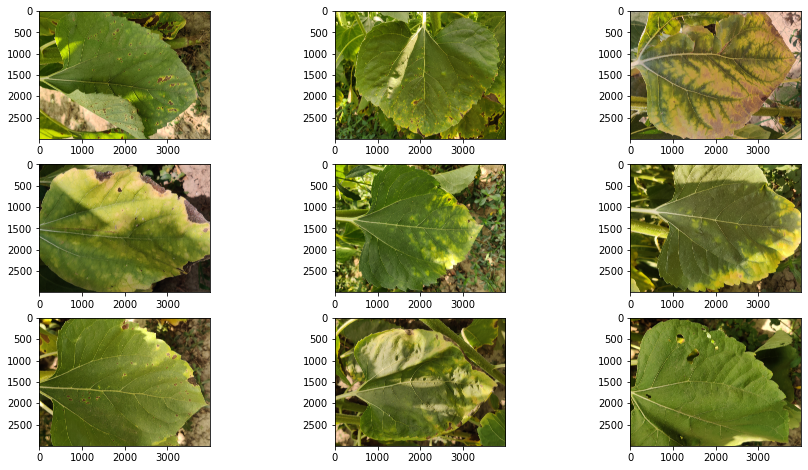

In [17]:
visualize_random_images("/content/test_train-original/train/Downy mildew(120)/downymildew.  (10).jpg")

In [18]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [19]:
from keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential,load_model,save_model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D

In [20]:

# model=Sequential()


# model.add(Conv2D(32, (3, 3) ,activation='relu', input_shape=(224, 224, 3)))
# model.add(MaxPooling2D(2, padding='same'))


# model.add(Conv2D(64, (3, 3) ,activation='relu', padding='same'))
# model.add(MaxPooling2D(2, padding='same'))
# model.add(BatchNormalization())


# model.add(Conv2D(128, (3, 3) ,activation='relu', padding='same'))
# model.add(MaxPooling2D(2, padding='same'))
# model.add(BatchNormalization())

# model.add(Conv2D(256, (3, 3) ,activation='relu', padding='same'))
# model.add(MaxPooling2D(2, padding='same'))
# model.add(BatchNormalization())

# model.add(Conv2D(512, (3, 3) ,activation='relu', padding='same'))
# model.add(MaxPooling2D(2, padding='same'))
# model.add(BatchNormalization())

# model.add(Flatten())

# model.add(Dense(1024 , activation='relu'))
# model.add(layers.Dropout(.2))
# model.add(Dense(1024, activation='relu'))


# model.add(Dense(20, activation='softmax'))


In [21]:
# base_model = tf.keras.applications.mobilenet.MobileNet(include_top=False)
# base_model.trainable = False

# for layer in base_model.layers[:-5]:
#   layer.trainable = False

# inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
# base_layer = base_model(inputs)

# flat_layer = layers.Flatten()(base_layer)

# outputs = layers.Dense(20, activation="softmax")(flat_layer)
# model = Model(inputs, outputs)

In [24]:
base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top=False)
base_model.trainable = False

for layer in base_model.layers[:-5]:
  layer.trainable = False

inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
base_layer = base_model(inputs)

flat_layer = layers.Flatten()(base_layer)

outputs = layers.Dense(20, activation="softmax")(flat_layer)
model = Model(inputs, outputs)

9420800/9406464 [==============================] - 0s 0us/step


In [25]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history = model.fit(train_gen,
                       epochs=40,
                       validation_data=val_gen)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/40
128/128 [==============================] - 114s 792ms/step - loss: 8.6877 - accuracy: 0.3907 - val_loss: 5.4423 - val_accuracy: 0.4940
Epoch 2/40
128/128 [==============================] - 97s 760ms/step - loss: 1.9784 - accuracy: 0.7084 - val_loss: 4.3505 - val_accuracy: 0.5339
Epoch 3/40
128/128 [==============================] - 96s 751ms/step - loss: 0.9916 - accuracy: 0.8205 - val_loss: 4.1061 - val_accuracy: 0.5558
Epoch 4/40
128/128 [==============================] - 94s 732ms/step - loss: 0.6863 - accuracy: 0.8570 - val_loss: 4.0469 - val_accuracy: 0.5956
Epoch 5/40
128/128 [==============================] - 95s 744ms/step - loss: 0.5854 - accuracy: 0.8955 - val_loss: 5.2846 - val_accuracy: 0.5876
Epoch 6/40
128/128 [==============================] - 95s 741ms/step - loss: 0.6208 - accuracy: 0.9088 - val_loss: 5.6328 - val_accuracy: 0.5179
Epoch 7/40
128/128 [==============================] - 95s 743ms/step - loss: 0.8230 - accuracy: 0.8842 - val_loss: 5.1617 - val_a

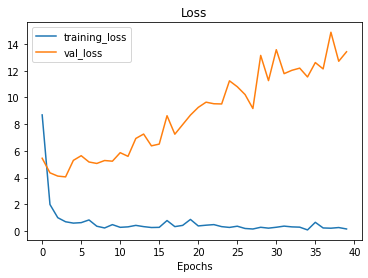

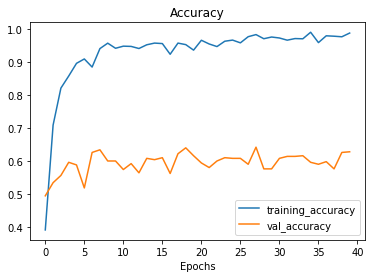

In [26]:
plot_loss_curves(history)

In [27]:
model.evaluate(test_gen)

17/17 [==============================] - 18s 1s/step - loss: 11.3491 - accuracy: 0.6046


[11.349113464355469, 0.6045627593994141]

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from keras.utils.np_utils import to_categorical
import numpy as np
print("==============TEST RESULTS============")

num_classes = len(train_gen.class_indices)
test_labels = test_gen.classes
test_labels = to_categorical(test_labels, num_classes=num_classes)
y_true = [i.argmax() for i in test_labels]

predictions = model.predict(test_gen, verbose=1)
yPredictions = np.argmax(predictions, axis=1)
true_classes = test_gen.classes
confusion_mtx = confusion_matrix(true_classes, yPredictions) 
y_pred_probabilities=yPredictions
classnames=[]
for classname in test_gen.class_indices:
    classnames.append(classname)

target_names = classnames
print(classification_report(true_classes, yPredictions, target_names=target_names))

# print('roc_auc_score = ' + str(roc_auc_score( true_classes, yPredictions)))

==============TEST RESULTS============
17/17 [==============================] - 11s 676ms/step
                                     precision    recall  f1-score   support

               Apple Aphis spp(162)       1.00      0.18      0.30        17
      Apple Eriosoma lanigerum(366)       0.53      0.76      0.62        38
           Apple Monillia laxa(255)       0.46      0.23      0.31        26
     Apple Venturia inaequalis(633)       0.59      0.41      0.48        64
Apricot Coryneum beijerinckii(1101)       0.59      0.74      0.65       111
          Apricot Monillia laxa(85)       0.33      0.11      0.17         9
                 Cancer symptom(76)       0.67      0.67      0.67         9
              Cherry Aphis spp(356)       0.67      0.76      0.71        37
                  Downy mildew(120)       0.67      0.33      0.44        12
                Drying symptom(156)       1.00      0.87      0.93        15
                      Gray mold(72)       1.00      1.00 

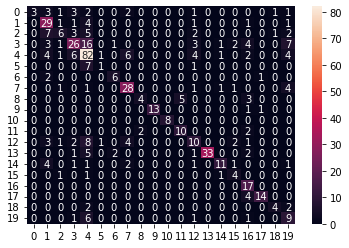

In [30]:
sns.heatmap(confusion_mtx.astype("int"), annot=True)